Conversational AI Model Ranking:
+----+------------+--------+----------------------+-------------+-----------+----------------+--------+
|    | Model      |   BLEU |   Response Coherence |   Diversity |   Latency |   TOPSIS Score |   Rank |
+====+============+========+======================+=============+===========+================+========+
|  1 | BlenderBot |   0.78 |                 0.85 |        0.76 |       180 |       0.701065 |      1 |
+----+------------+--------+----------------------+-------------+-----------+----------------+--------+
|  2 | ChatGPT    |   0.77 |                 0.83 |        0.74 |       220 |       0.653536 |      2 |
+----+------------+--------+----------------------+-------------+-----------+----------------+--------+
|  0 | DialoGPT   |   0.75 |                 0.8  |        0.72 |       200 |       0.172538 |      3 |
+----+------------+--------+----------------------+-------------+-----------+----------------+--------+


<ipython-input-3-f2e3bc2cfb0f>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_conversational['Model'], y=results_conversational['TOPSIS Score'], palette='viridis')


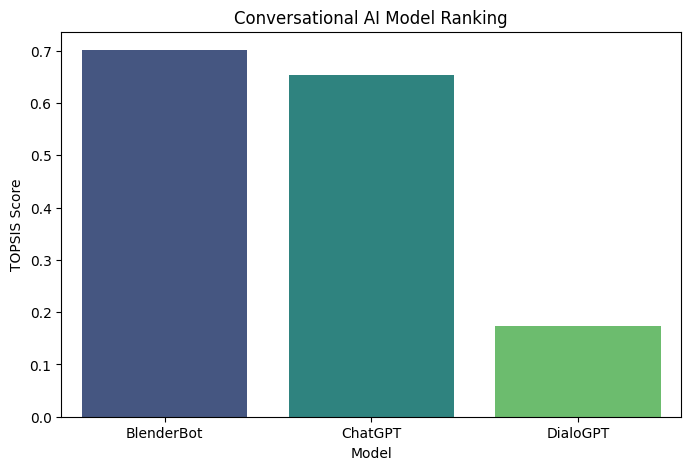

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

# Function to perform TOPSIS evaluation
def topsis(data, weights):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data.iloc[:, 1:])

    weighted_data = normalized_data * weights

    ideal_best = np.max(weighted_data, axis=0)
    ideal_worst = np.min(weighted_data, axis=0)

    distance_best = np.sqrt(np.sum((weighted_data - ideal_best) ** 2, axis=1))
    distance_worst = np.sqrt(np.sum((weighted_data - ideal_worst) ** 2, axis=1))

    topsis_score = distance_worst / (distance_best + distance_worst)

    data['TOPSIS Score'] = topsis_score
    data['Rank'] = data['TOPSIS Score'].rank(ascending=False)
    return data.sort_values(by='Rank')

# Dataset for conversational AI model evaluation
data_conversational = pd.DataFrame({
    "Model": ["DialoGPT", "BlenderBot", "ChatGPT"],
    "BLEU": [0.75, 0.78, 0.77],
    "Response Coherence": [0.80, 0.85, 0.83],
    "Diversity": [0.72, 0.76, 0.74],
    "Latency": [200, 180, 220]  # Lower is preferable
})

# Assigned weights for evaluation criteria
weights_conversational = [0.3, 0.3, 0.2, 0.2]

# Compute TOPSIS rankings
results_conversational = topsis(data_conversational, weights_conversational)

# Display results
print("Conversational AI Model Ranking:")
print(tabulate(results_conversational, headers='keys', tablefmt='grid'))

# Save results to CSV
results_conversational.to_csv('results_conversational.csv', index=False)

# Plot rankings
plt.figure(figsize=(8, 5))
sns.barplot(x=results_conversational['Model'], y=results_conversational['TOPSIS Score'], palette='viridis')
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("Conversational AI Model Ranking")
plt.show()
